In [8]:
# Necessary imports
from data_preprocessing import make_stft_dataset
import h5py

# For plotting examples
import numpy as np
from matplotlib import pyplot as plt
fig_size = [0,0]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

### Processing raw data

In [9]:
# Path to the data set (change this to point to a folder containing data to process)
data_directory = '/Users/patrickc/data/LibriSpeech/dev-clean/'

# Which level of subfolders to use as keys (for dev-clean sublevel 1 corresponds to speaker ids)
key_level = 1

# Which type of files to process
file_type = '.flac'

# file name of output file
output_file = '/Users/patrickc/data/LibriSpeech/processed_dev-clean.h5'

# Make the data set
make_stft_dataset(data_directory,key_level,file_type,output_file)

### Reading in data from the output file

In [10]:
with h5py.File(output_file,'r') as test:
    data = []
    for key in test.keys():
        data += [i[:] for i in test[key].values()]

### Plot some of the data that was read in

In [15]:
example = np.sqrt(np.abs(data[-1][:128,:])).T
print(example.shape)

(513, 128)


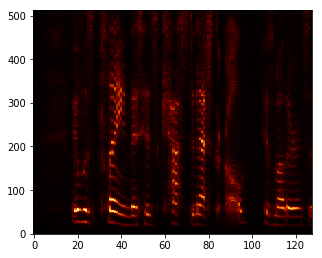

In [20]:
plt.figure(figsize=(5,8))
plt.imshow(example,origin='lower',cmap='afmhot',aspect=0.2)
plt.show()